# METODE KEMOMETRIK PCA-SVM

# A. PRINCIPAL COMPONENT ANALYSIS

Principal Component Analysis (PCA) adalah salah satu teknik analisis eksplorasi yang populer digunakan dalam kemometrik (Hayati dkk., 2023), yang bertujuan untuk mengurangi dimensi spektra menjadi sejumlah kecil komponen utama (Marengo & Robotti, 2016).

## 1. Mengimpor library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 2. Mengimpor dataset

In [ ]:
DataMinyak = pd.read_excel("/content/Data Sigma2.xlsx", sheet_name="Data Sigma2")

In [ ]:
# Memeriksa dataset
print(DataMinyak.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G1      15 non-null     float64
 1   G2      15 non-null     float64
 2   G3      15 non-null     float64
 3   G4      15 non-null     float64
 4   G5      15 non-null     float64
 5   G6      15 non-null     float64
 6   G7      15 non-null     float64
 7   G8      15 non-null     float64
 8   G9      15 non-null     float64
 9   G10     15 non-null     float64
 10  G11     15 non-null     float64
 11  G12     15 non-null     float64
 12  G13     15 non-null     float64
 13  G14     15 non-null     float64
 14  G15     15 non-null     float64
 15  G16     15 non-null     float64
 16  G17     15 non-null     float64
 17  G18     15 non-null     float64
 18  grup    15 non-null     int64  
dtypes: float64(18), int64(1)
memory usage: 2.4 KB
None


Semua variabel dalam dataset tidak ada yang null dan tipe data numerik

## 3. Membagi data X dan Y dari dataset

In [ ]:
X,Y = DataMinyak.iloc[:,:18].values, DataMinyak.iloc[:,18].values
print("Data X :\n", X)
print("Data Y :\n",Y)

Data X :
 [[300.7024144 292.4085056 285.2718864 174.7507296 174.3649664 146.590016
  145.8184896 141.767976  137.7174624 136.3672912 123.8299872 116.3076048
  111.6784464 109.942512  102.9987744  96.8265632  91.2329968  72.1377184]
 [300.7024144 292.4085056 285.464768  174.7507296 146.590016  145.8184896
  141.9608576 139.4533968 137.7174624 136.3672912 123.8299872 116.3076048
  111.871328  109.942512  102.8058928  97.0194448  91.2329968  72.1377184]
 [300.7024144 292.4085056 285.2718864 174.7507296 146.3971344 145.625608
  141.767976  137.7174624 136.1744096 123.8299872 116.3076048 111.871328
  109.942512  102.9987744  91.2329968  86.9896016  85.4465488  72.1377184]
 [300.5095328 292.4085056 285.2718864 238.208776  174.3649664 146.590016
  145.8184896 141.9608576 140.0320416 137.7174624 136.3672912 123.8299872
  116.3076048 111.871328  109.7496304 102.8058928  97.0194448  72.3306   ]
 [300.7024144 292.4085056 285.2718864 238.5945392 174.7507296 146.3971344
  145.625608  141.767976  14

## 4. Membagi data menjadi train dan test set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3 , random_state = 0)
print(" Data Train X:\n", X_train)
print(" Data Train Y:\n", Y_train)

 Data Train X:
 [[300.7024144 292.4085056 285.2718864 238.5945392 174.7507296 146.3971344
  145.625608  141.767976  140.2249232 137.7174624 136.1744096 123.8299872
  116.3076048 111.871328  109.7496304 102.9987744  96.8265632  72.3306   ]
 [300.7024144 292.4085056 285.2718864 174.7507296 146.3971344 145.625608
  141.767976  137.7174624 136.1744096 123.8299872 116.3076048 111.871328
  109.942512  102.9987744  91.2329968  86.9896016  85.4465488  72.1377184]
 [300.5095328 292.4085056 285.2718864 235.8941968 234.1582624 174.7507296
  145.8184896 141.767976  137.5245808 136.1744096 133.8598304 131.7381328
  123.8299872 116.5004864 111.871328  109.942512  103.191656   72.1377184]
 [300.5095328 292.4085056 285.2718864 235.8941968 234.1582624 174.7507296
  145.8184896 141.767976  137.7174624 135.5957648 134.052712  131.3523696
  123.8299872 116.3076048 111.871328  109.7496304 102.9987744  72.1377184]
 [346.9939984 300.5095328 292.4085056 285.464768  238.0158944 234.9297888
  174.7507296 145.81

## 5. Menghitung matriks covarians, eigenvalue, dan eigenvector

In [ ]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
print("Eigenvalue:\n", eigen_vals)
print("")
print("Varians kumulatif:\n", cum_var_exp)

Eigenvalue:
 [ 2.89445065e+03+0.00000000e+00j  5.07951159e+02+0.00000000e+00j
  3.42765004e+02+0.00000000e+00j  3.45339155e+01+0.00000000e+00j
  1.61090484e+01+0.00000000e+00j  3.95433015e-02+0.00000000e+00j
  1.62774887e-02+0.00000000e+00j  7.54931549e-03+0.00000000e+00j
  1.40848186e-03+0.00000000e+00j  5.82115798e-14+0.00000000e+00j
  3.05847459e-14+5.98053464e-15j  3.05847459e-14-5.98053464e-15j
 -9.18863892e-15+1.62528589e-14j -9.18863892e-15-1.62528589e-14j
 -1.54219976e-14+0.00000000e+00j -7.48797499e-15+0.00000000e+00j
  6.07103218e-15+0.00000000e+00j  1.44882886e-18+0.00000000e+00j]

Varians kumulatif:
 [0.76252537+0.00000000e+00j 0.896342  +0.00000000e+00j
 0.98664135+0.00000000e+00j 0.9957391 +0.00000000e+00j
 0.99998293+0.00000000e+00j 0.99999335+0.00000000e+00j
 0.99999764+0.00000000e+00j 0.99999963+0.00000000e+00j
 1.        +0.00000000e+00j 1.        +0.00000000e+00j
 1.        +1.57553537e-18j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j 1.        +0.00000000e

## 6. Menampilkan plot varians dari setiap Principal Components

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


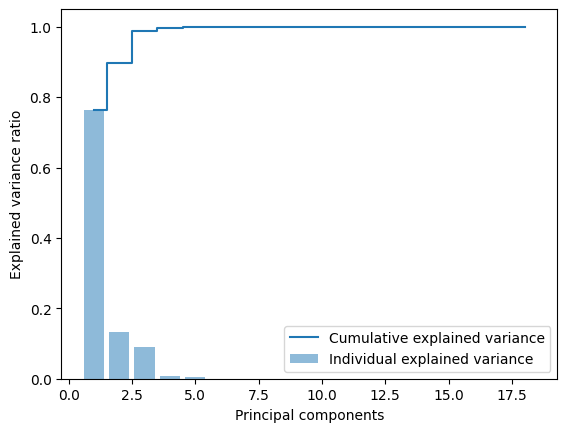

In [ ]:
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

plt.show()

In [ ]:
print(" Varians PC: \n", pd.DataFrame(var_exp))
print("")
print(" Varians Kumulatif PC: \n", pd.DataFrame(cum_var_exp))

 Varians PC: 
                              0
0   7.625254e-01+0.000000e+00j
1   1.338166e-01+0.000000e+00j
2   9.029935e-02+0.000000e+00j
3   9.097749e-03+0.000000e+00j
4   4.243831e-03+0.000000e+00j
5   1.041744e-05+0.000000e+00j
6   4.288205e-06+0.000000e+00j
7   1.988821e-06+0.000000e+00j
8   3.710560e-07+0.000000e+00j
9   1.533549e-17+0.000000e+00j
10  8.057365e-18+1.575535e-18j
11  8.057365e-18-1.575535e-18j
12  1.599376e-18+0.000000e+00j
13  3.816851e-22+0.000000e+00j
14 -1.972661e-18+0.000000e+00j
15 -2.420691e-18+4.281717e-18j
16 -2.420691e-18-4.281717e-18j
17 -4.062831e-18+0.000000e+00j

 Varians Kumulatif PC: 
                      0
0   0.762525+0.000000j
1   0.896342+0.000000j
2   0.986641+0.000000j
3   0.995739+0.000000j
4   0.999983+0.000000j
5   0.999993+0.000000j
6   0.999998+0.000000j
7   1.000000+0.000000j
8   1.000000+0.000000j
9   1.000000+0.000000j
10  1.000000+0.000000j
11  1.000000+0.000000j
12  1.000000+0.000000j
13  1.000000+0.000000j
14  1.000000+0.000000j
15

## 7. Mengurutkan nilai eigenvalue

In [ ]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

## 8.Memilih dua Principal Components

In [ ]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print("Dua komponen utama:\n", pd.DataFrame(W))

Dua komponen utama:
                      0                   1
0  -0.176940+0.000000j -0.389741+0.000000j
1  -0.031014+0.000000j -0.067991+0.000000j
2  -0.027322+0.000000j -0.059897+0.000000j
3  -0.524188+0.000000j -0.501337+0.000000j
4  -0.604838+0.000000j  0.659521+0.000000j
5  -0.469044+0.000000j -0.199075+0.000000j
6  -0.123870+0.000000j -0.235882+0.000000j
7  -0.028502+0.000000j -0.027524+0.000000j
8  -0.014455+0.000000j -0.061579+0.000000j
9  -0.047276+0.000000j -0.025959+0.000000j
10 -0.102063+0.000000j -0.000269+0.000000j
11 -0.147852+0.000000j  0.078933+0.000000j
12 -0.099108+0.000000j  0.099635+0.000000j
13 -0.073637+0.000000j  0.067087+0.000000j
14 -0.101090+0.000000j  0.068365+0.000000j
15 -0.129633+0.000000j  0.112730+0.000000j
16 -0.115037+0.000000j  0.122659+0.000000j
17  0.000535+0.000000j -0.002256+0.000000j


## 9. Mentransformasi (memproyeksikan) data training ke dalam ruang PCA

In [ ]:
X_train_pca = X_train.dot(W)
X_test_pca = X_test.dot(W)

In [ ]:
print("Dua komponen utama data training:\n", X_train_pca)
print("")
print("Dua komponen utama data testing:\n", X_test_pca)

Dua komponen utama data training:
 [[-487.63544014+0.j -178.47656978+0.j]
 [-425.01356007+0.j -170.01816298+0.j]
 [-539.19507941+0.j -139.95687309+0.j]
 [-539.07176653+0.j -140.04257278+0.j]
 [-609.38206496+0.j -200.29131138+0.j]
 [-539.13476846+0.j -139.95793686+0.j]
 [-487.29971722+0.j -178.53788082+0.j]
 [-448.85138017+0.j -149.6422009 +0.j]
 [-481.7409347 +0.j -182.22332508+0.j]
 [-539.19278918+0.j -140.07860792+0.j]]

Dua komponen utama data testing:
 [[-431.1762441 +0.j -166.81690205+0.j]
 [-614.92427271+0.j -209.10993862+0.j]
 [-609.38206496+0.j -200.29131138+0.j]
 [-539.02467429+0.j -140.11216173+0.j]
 [-539.94625773+0.j -140.42473063+0.j]]


## 10.Melakukan visualisasi data hasil transformasi antara PC-1 dan PC-2

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


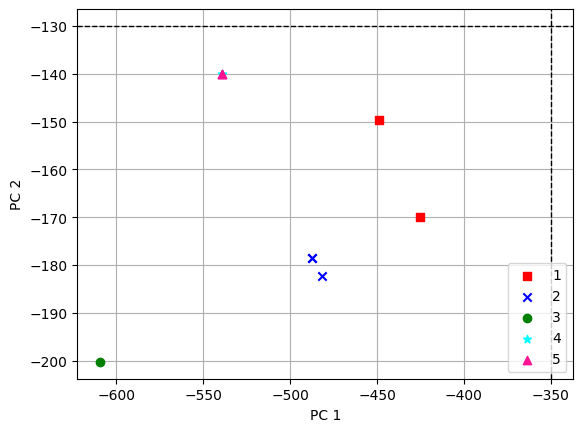

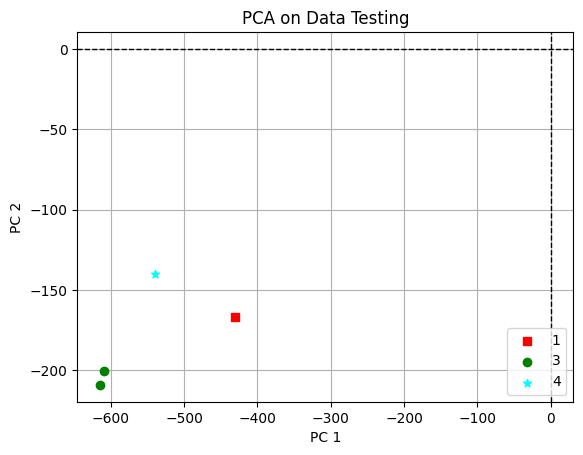

In [ ]:
plt.subplot(111)
colors = ['r', 'b', 'g','cyan','deeppink']
markers = ['s', 'x', 'o','*','^']


for label, color, marker in zip(np.unique(Y_train), colors, markers):
  plt.scatter(X_train_pca[Y_train == label, 0], X_train_pca[Y_train == label, 1], c=color, label=label, marker=marker, zorder=2)

# Additional plot settings
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axhline(-130, color='black', linestyle='--', linewidth=1)
plt.axvline(-350, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

plt.subplot(111)
colors = ['r', 'g','cyan']
markers = ['s', 'o','*']

for label, color, marker in zip(np.unique(Y_test), colors, markers):
  plt.scatter(X_test_pca[Y_test == label, 0], X_test_pca[Y_test == label, 1], c=color, label=label, marker=marker,zorder=2)

# Additional plot settings
plt.title('PCA on Data Testing')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

# SUPPORT VECTOR MACHINE (SVM)

Suppport Vector Machine (SVM) adalah metode yang membuat hyperplane terpisah dalam ruang n-dimensi dengan memaksimalkan margin antara dua kelas (Hayati dkk., 2023).

# PCA-SVM

Data yang digunakan dalam perhitungan SVM adalah dua komponen utama hasil reduksi data training dari PCA

## 1. Mengimport library

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn. preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## 2. Mengubah data komponen utama yang kompleks menjadi dara real

In [ ]:
X_train_svm = np.real(X_train_pca)
X_test_svm = np.real(X_test_pca)

## 3. Membuat Model SVM

In [ ]:
# Model Fungsi Linear SVM
modelL = LinearSVC(C=1.0)

# Model Fungsi RBF SVM
model1 = svm.SVC(kernel='rbf', C=1.0,gamma=0.0001)
model4 = svm.SVC(kernel='rbf', C=4.0,gamma=0.0001)
model8 = svm.SVC(kernel='rbf', C=8.0, gamma=0.0001)

## 4. Mentraining Model SVM

In [ ]:
modelL = modelL.fit(X_train_svm, Y_train)
model1 = model1.fit(X_train_svm, Y_train)
model4 = model4.fit(X_train_svm, Y_train)
model8 = model8.fit(X_train_svm, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## 5. Membuat prediksi dari data training

In [ ]:
Y_pred = modelL.predict(X_train_svm)
print('Accuracy of SVM classification on train set: {:.2f}'.
      format(modelL.score(X_train_svm,Y_train)))

# Confusion matrix dan classification report
conf_matrix = confusion_matrix(Y_train, Y_pred)
print(conf_matrix)

class_report = classification_report(Y_train, Y_pred)
print(class_report)

Accuracy of SVM classification on train set: 0.30
[[0 2 0 0 0]
 [0 3 0 0 0]
 [0 1 0 0 0]
 [0 2 0 0 0]
 [0 2 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.30      1.00      0.46         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.30        10
   macro avg       0.06      0.20      0.09        10
weighted avg       0.09      0.30      0.14        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Y_pred = model1.predict(X_train_svm)
print('Accuracy of SVM classification on train set: {:.2f}'.
      format(model1.score(X_train_svm,Y_train)))

# Confusion matrix dan classification report
conf_matrix = confusion_matrix(Y_train, Y_pred)
print(conf_matrix)

class_report = classification_report(Y_train, Y_pred)
print(class_report)

Accuracy of SVM classification on train set: 0.90
[[1 1 0 0 0]
 [0 3 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           0.90        10
   macro avg       0.95      0.90      0.90        10
weighted avg       0.93      0.90      0.89        10



In [ ]:
Y_pred = model4.predict(X_train_svm)
print('Accuracy of SVM classification on train set: {:.2f}'.
      format(model4.score(X_train_svm,Y_train)))

# Confusion matrix dan classification report
conf_matrix = confusion_matrix(Y_train, Y_pred)
print(conf_matrix)

class_report = classification_report(Y_train, Y_pred)
print(class_report)

Accuracy of SVM classification on train set: 1.00
[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
Y_pred = model8.predict(X_train_svm)
print('Accuracy of SVM classification on train set: {:.2f}'.
      format(model8.score(X_train_svm,Y_train)))

# Confusion matrix dan classification report
conf_matrix = confusion_matrix(Y_train, Y_pred)
print(conf_matrix)

class_report = classification_report(Y_train, Y_pred)
print(class_report)

Accuracy of SVM classification on train set: 1.00
[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## 6. Membuat prediksi dari data testing

In [ ]:
Y_pred = modelL.predict(X_test_svm)
print('Accuracy of SVM classification on test set: {:.2f}'.
      format(modelL.score(X_test_svm,Y_test)))

# Confusion matrix dan classification report
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

class_report = classification_report(Y_test, Y_pred)
print(class_report)

Accuracy of SVM classification on test set: 0.00
[[0 1 0 0 0]
 [0 0 0 0 0]
 [0 2 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       2.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
Y_pred = model1.predict(X_test_svm)
print('Accuracy of SVM classification on test set: {:.2f}'.
      format(model1.score(X_test_svm,Y_test)))

# Confusion matrix dan classification report
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

class_report = classification_report(Y_test, Y_pred)
print(class_report)

Accuracy of SVM classification on test set: 0.80
[[0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 2 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1

    accuracy                           0.80         5
   macro avg       0.60      0.60      0.60         5
weighted avg       0.80      0.80      0.80         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
Y_pred = model4.predict(X_test_svm)
print('Accuracy of SVM classification on test set: {:.2f}'.
      format(model4.score(X_test_svm,Y_test)))

# Confusion matrix dan classification report
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

class_report = classification_report(Y_test, Y_pred)
print(class_report)

Accuracy of SVM classification on test set: 1.00
[[1 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 0 0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [ ]:
Y_pred = model8.predict(X_test_svm)
print('Accuracy of SVM classification on test set: {:.2f}'.
      format(model8.score(X_test_svm,Y_test)))

# Confusion matrix dan classification report
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

class_report = classification_report(Y_test, Y_pred)
print(class_report)

Accuracy of SVM classification on test set: 1.00
[[1 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 0 0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



## 7.Memvisualisasikan plot SVM RBF Data training

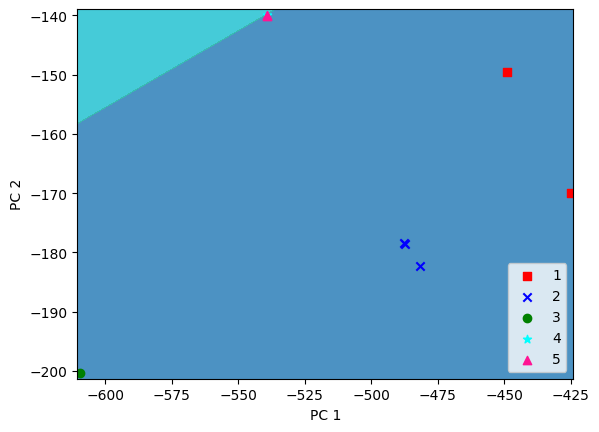

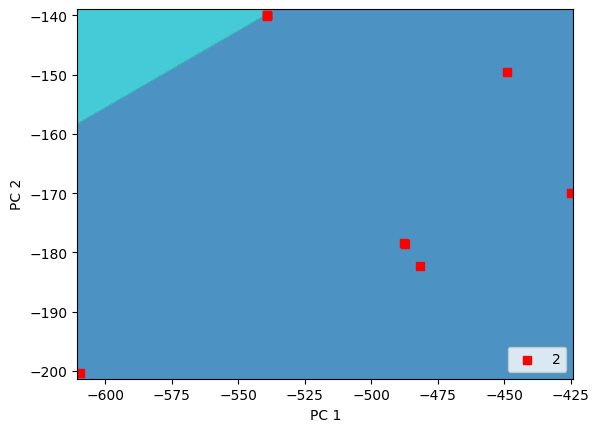

In [ ]:
# Model Linear
plt.subplot(111)
# Data Asli
X = X_train_svm
y = Y_train

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = modelL.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

plt.subplot(111)
# Data Predict
Y_pred = modelL.predict(X_train_svm)
X = X_train_svm
y = Y_pred

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = modelL.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

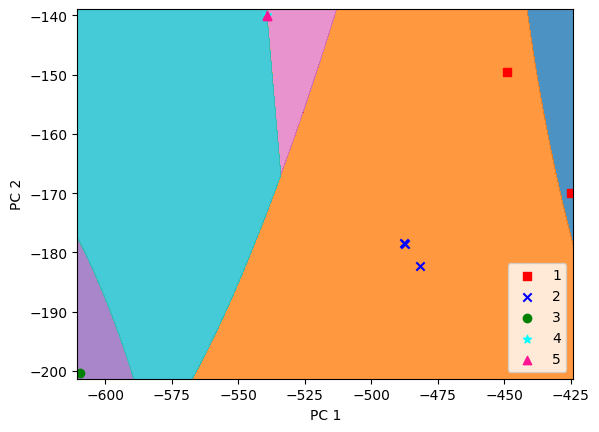

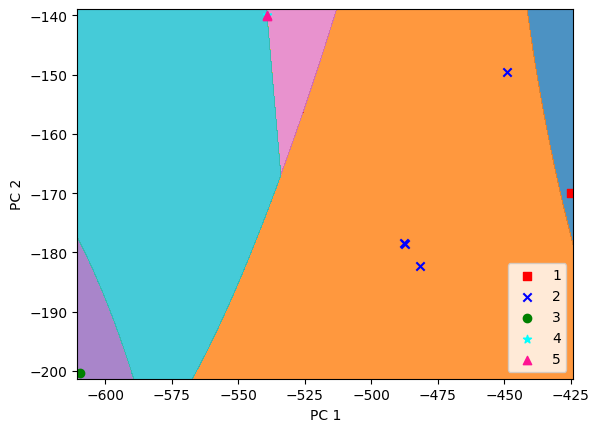

In [ ]:
# Model RBF SVM 1
plt.subplot(111)
# Data Asli
X = X_train_svm
y = Y_train

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

plt.subplot(111)
# Data Predict
Y_pred = model1.predict(X_train_svm)
X = X_train_svm
y = Y_pred

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

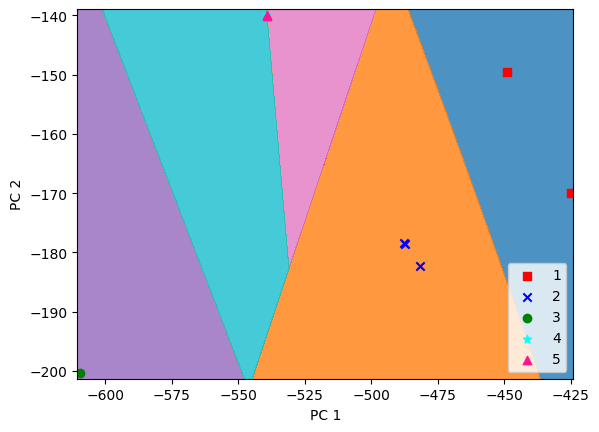

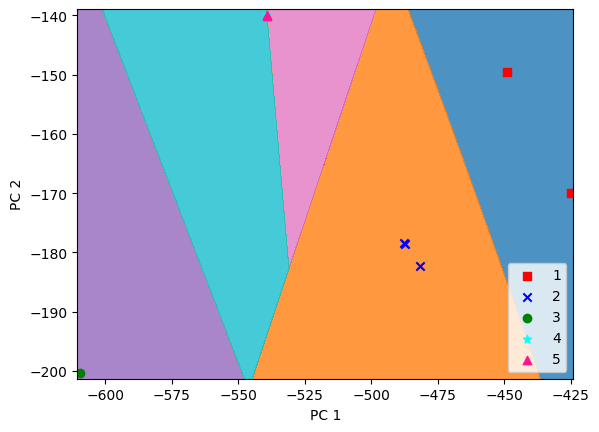

In [ ]:
# Model RBF SVM 1
plt.subplot(111)
# Data Asli
X = X_train_svm
y = Y_train

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

plt.subplot(111)
# Data Predict
Y_pred = model4.predict(X_train_svm)
X = X_train_svm
y = Y_pred

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

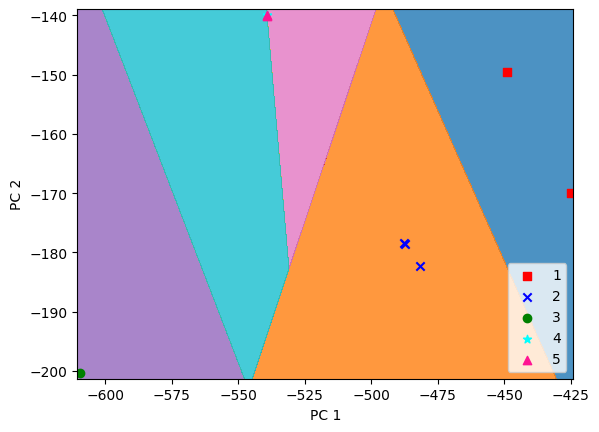

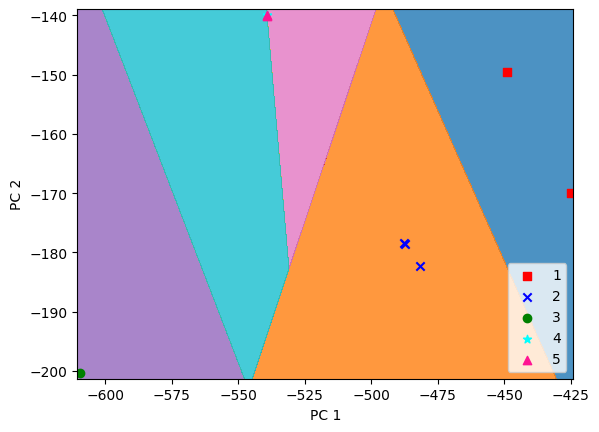

In [ ]:
# Model RBF SVM 1
plt.subplot(111)
# Data Asli
X = X_train_svm
y = Y_train

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = model8.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

plt.subplot(111)
# Data Predict
Y_pred = model8.predict(X_train_svm)
X = X_train_svm
y = Y_pred

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = model8.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

## 7.Memvisualisasikan plot SVM RBF Data Testing

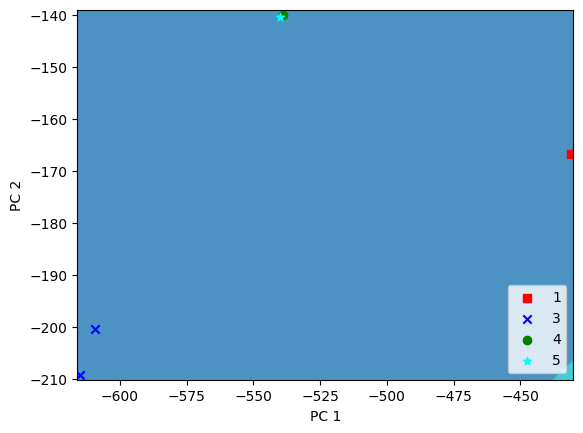

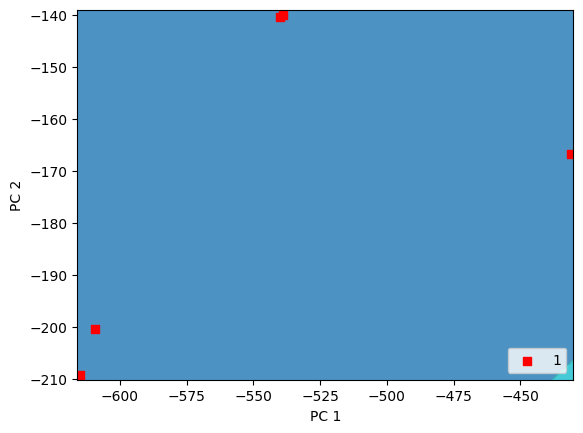

In [ ]:
# Model Linear SVM
plt.subplot(111)
# Data Asli
X = X_test_svm
y = Y_test

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = modelL.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

plt.subplot(111)
# Data Predict
Y_pred = modelL.predict(X_test_svm)
X = X_test_svm
y = Y_pred

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = modelL.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

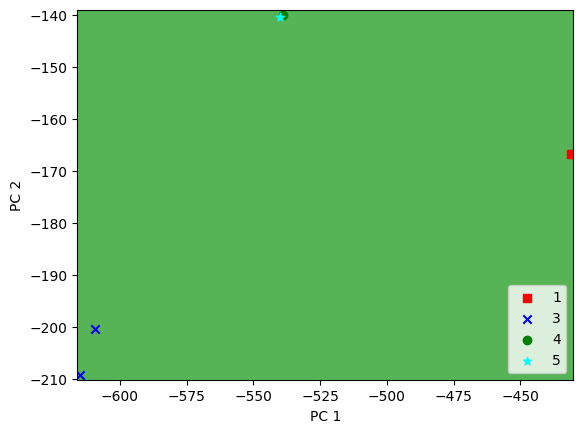

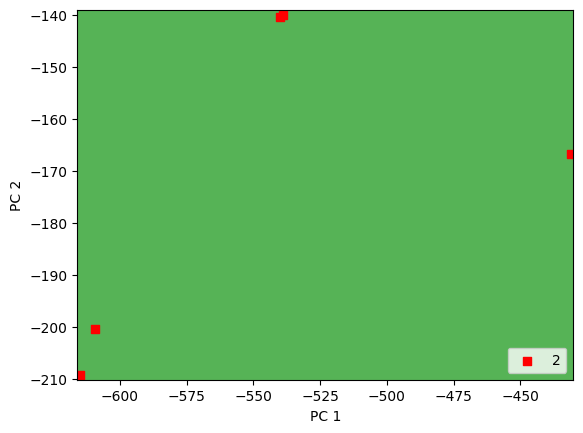

In [ ]:
# Model RBF SVM 1
plt.subplot(111)
# Data Asli
X = X_test_svm
y = Y_test

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

plt.subplot(111)
# Data Predict
Y_pred = model1.predict(X_test_svm)
X = X_test_svm
y = Y_pred

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

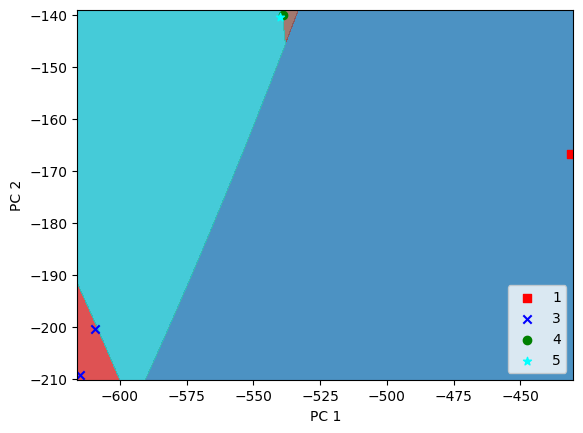

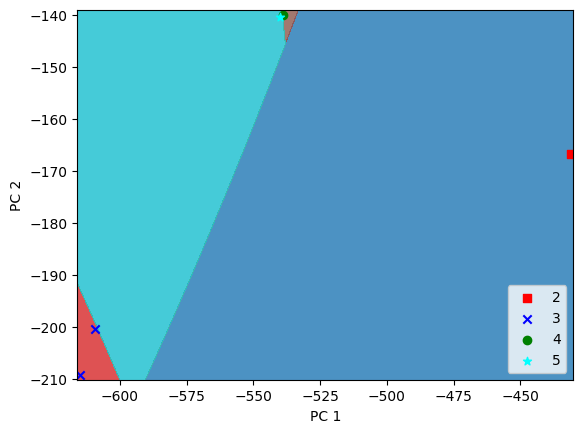

In [ ]:
# Model RBF SVM 4
plt.subplot(111)
# Data Asli
X = X_test_svm
y = Y_test

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

plt.subplot(111)
# Data Predict
Y_pred = model4.predict(X_test_svm)
X = X_test_svm
y = Y_pred

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

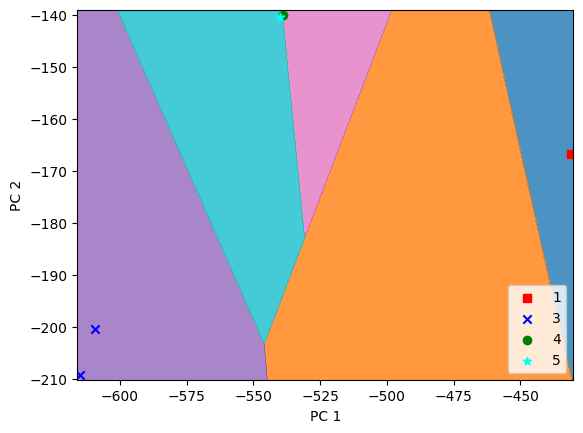

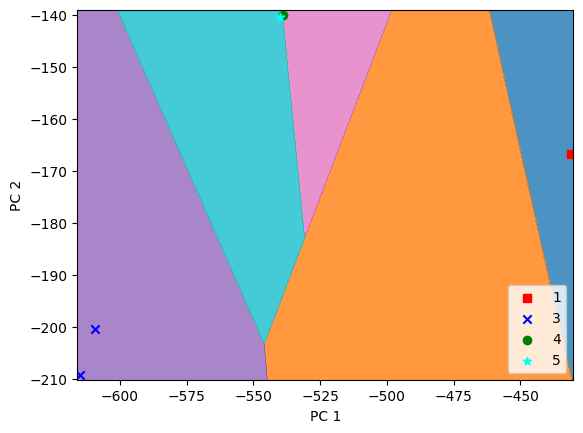

In [ ]:
# Model RBF SVM 8
plt.subplot(111)
# Data Asli
X = X_test_svm
y = Y_test

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = model8.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

plt.subplot(111)
# Data Predict
Y_pred = model8.predict(X_test_svm)
X = X_test_svm
y = Y_pred

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Memprediksi kelas untuk setiap titik pada meshgrid
Z = model8.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot hasil prediksi
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()